<a href="https://colab.research.google.com/github/hyeryn/Natural-Language/blob/master/news_posneg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

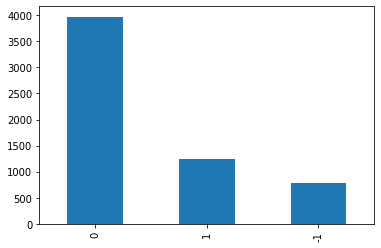

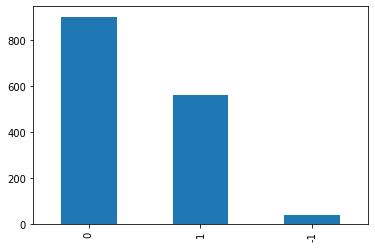

   label  count
0     -1    791
1      0   3971
2      1   1238
   label  count
0     -1     40
1      0    900
2      1    560


In [5]:
import pandas as pd

train_data = pd.read_csv("/content/sample_data/train_dataset_1007.csv")
test_data = pd.read_csv("/content/sample_data/test_dataset_1007.csv")

%matplotlib inline
import matplotlib.pyplot as plt
train_data['label'].value_counts().plot(kind='bar')
plt.show()
test_data['label'].value_counts().plot(kind='bar')
plt.show()

print(train_data.groupby('label').size().reset_index(name='count'))
print(test_data.groupby('label').size().reset_index(name='count'))

In [7]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 450kB 22.8MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [8]:
#데이터 전처리
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

import konlpy
from konlpy.tag import Okt
okt = Okt()
X_train = []
for sentence in train_data['title']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

X_test = []

for sentence in test_data['title']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [10]:
#토큰화 잘 되었는지 체크
print(X_train[:3])
print(X_test[:3])

[['버거킹', '바삭', '신', '메뉴', '3000원', '안되다', '가격'], ['버거킹', '가을', '맞이', '와퍼주니어', '1900원', '판매'], ['귀엽다', '오싹하다', '’', '할로윈데이', '겨냥', '이색', '식', '음료', '출시']]
[['더벨맘스', '터치', '가맹', '점포', '롯데리아', '앞', '지르다', '1', '위', '우뚝'], ['롯데리아', '맘스터치', '패스트푸드', '점', '위생', '적발', '5년', '간', '50', '증가'], ['맘스', '터치', '도시락', '달', '만에', '3만', '개', '완판잘', '나가다', '치킨', '프랜차이즈', '간편식']]


In [11]:
#정수인코딩
from keras.preprocessing.text import Tokenizer 

max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)


In [12]:
#정수인코딩 체크
print(X_train[:3])
print(X_test[:3])

[[1, 172, 68, 15, 1755, 1756, 30], [1, 541, 178, 66, 215, 22], [2433, 4299, 2, 982, 1073, 317, 216, 270, 12]]
[[407, 27, 1676, 93, 736, 2586, 70, 43, 2761], [93, 87, 55, 3171, 2109, 1305, 117, 184, 1288], [429, 407, 1687, 147, 135, 29, 1822, 78, 84, 1311]]


제목의 최대 길이 :  20
제목의 평균 길이 :  10.525333333333334


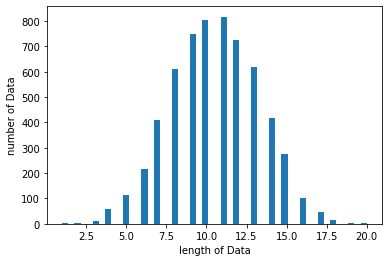

제목의 최대 길이 :  17
제목의 평균 길이 :  8.979333333333333


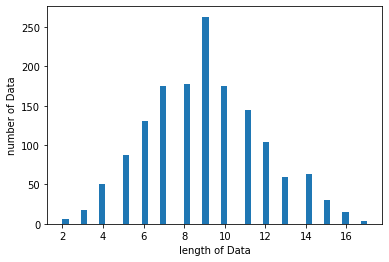

In [14]:
#데이터분포 체크 - train
print("제목의 최대 길이 : ", max(len(l) for l in X_train)) 
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train)) 
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data')
plt.show()
#데이터분포 체크 - test
print("제목의 최대 길이 : ", max(len(l) for l in X_test)) 
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data')
plt.show()

In [18]:
#y값 one-hot encoding
import numpy as np

y_train = [] 
y_test = [] 

for i in range(len(train_data['label'])): 
  if train_data['label'].iloc[i] == 1: 
    y_train.append([0, 0, 1]) 
  elif train_data['label'].iloc[i] == 0: 
    y_train.append([0, 1, 0]) 
  elif train_data['label'].iloc[i] == -1: 
    y_train.append([1, 0, 0]) 
    
for i in range(len(test_data['label'])): 
  if test_data['label'].iloc[i] == 1: 
    y_test.append([0, 0, 1]) 
  elif test_data['label'].iloc[i] == 0: 
    y_test.append([0, 1, 0]) 
  elif test_data['label'].iloc[i] == -1: 
    y_test.append([1, 0, 0]) 
    
y_train = np.array(y_train) 
y_test = np.array(y_test)

In [19]:
y_train

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [20]:
y_test

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [21]:
#모델만들기
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)

In [23]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 37s 36ms/step - loss: 0.6573 - accuracy: 0.7331 - val_loss: 0.2675 - val_accuracy: 0.9317
Epoch 2/10
540/540 [==============================] - 17s 32ms/step - loss: 0.1449 - accuracy: 0.9543 - val_loss: 0.2363 - val_accuracy: 0.9433
Epoch 3/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0743 - accuracy: 0.9802 - val_loss: 0.2117 - val_accuracy: 0.9567
Epoch 4/10
540/540 [==============================] - 18s 33ms/step - loss: 0.0437 - accuracy: 0.9874 - val_loss: 0.2810 - val_accuracy: 0.9400
Epoch 5/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.2968 - val_accuracy: 0.9267
Epoch 6/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 0.3672 - val_accuracy: 0.9267
Epoch 7/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.3294 - val_accuracy:

In [26]:
print("정확도 : {:.2f}%".format(model.evaluate(X_test, y_test)[1]*100))

47/47 [==============================] - 1s 9ms/step - loss: 0.3535 - accuracy: 0.9480
정확도 : 94.80%


In [27]:
#optimizer 변경
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 34s 58ms/step - loss: 0.6106 - accuracy: 0.7584 - val_loss: 0.1592 - val_accuracy: 0.9567
Epoch 2/10
540/540 [==============================] - 30s 55ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 0.1413 - val_accuracy: 0.9700
Epoch 3/10
540/540 [==============================] - 30s 56ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.1545 - val_accuracy: 0.9717
Epoch 4/10
540/540 [==============================] - 30s 56ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.1438 - val_accuracy: 0.9767
Epoch 5/10
540/540 [==============================] - 30s 56ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.1744 - val_accuracy: 0.9733
Epoch 6/10
540/540 [==============================] - 30s 55ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1751 - val_accuracy: 0.9783
Epoch 7/10
540/540 [==============================] - 29s 55ms/step - loss: 9.6544e-05 - accuracy: 1.0000 - val_loss: 0.1914 - val_accur

In [29]:
print("정확도 : {:.2f}%".format(model.evaluate(X_test, y_test)[1]*100))

47/47 [==============================] - 1s 9ms/step - loss: 0.3555 - accuracy: 0.9500
정확도 : 95.00%


In [30]:
predict = model.predict(X_test)

In [31]:
import numpy as np
predict_labels = np.argmax(predict, axis = 1)
original_labels = np.argmax(y_test, axis = 1)

for i in range(30):
  print("기사제목: ", test_data['title'].iloc[i], "/\t 원래라벨: ",original_labels[i],
        "/\t 예측한 라벨: ", predict_labels[i])

기사제목:  더벨맘스터치 가맹점포 롯데리아 앞질러1위 우뚝 /	 원래라벨:  2 /	 예측한 라벨:  1
기사제목:  롯데리아도 맘스터치도 패스트푸드점 위생적발 5년간 50 증가 /	 원래라벨:  2 /	 예측한 라벨:  0
기사제목:  맘스터치 도시락 한 달만에 3만개 완판잘 나가는 치킨 프랜차이즈 간편식 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  맘스터치 먹고 뉴이스트 · 옹성우 · 여자친구 보러가자 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  MTM터치 연중기획공연12세계의 음악도시 오스틴 내슈빌 아바나 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  기로에 선 자영업자 그래도 해법은 있다 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  단독 지금도 맥도날드서 벌레·이물질 줄줄줄반년새 21건 포스팅 충격 /	 원래라벨:  0 /	 예측한 라벨:  0
기사제목:  엄지족 잡아라패스트푸드도 배달 경쟁 가세 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  더벨강소 외식프랜차이즈 리포트해마로푸드 가격·품질 두마리 토끼 잡 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  맘스터치 펩시 콘서트 입장권 증정 이벤트 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  국내서 1위 쫓는 해마로푸드서비스 맘스터치’해외 사업은 지지부진 /	 원래라벨:  2 /	 예측한 라벨:  2
기사제목:  붐바타 창업박람회 참가제2의 맘스터치 시동건다 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  해마로푸드 붐바타로 제2의 맘스터치 시동건다 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  맘스터치 군대스리가 예비군편’ 추가 진행 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  맘스터치 뉴미디어 통해 기부나눔 알리다 /	 원래라벨:  2 /	 예측한 라벨:  2
기사제목:  맘스터치 필리핀 진출동남아 공략 가속화 /	 원래라벨:  2 /	 예측한 라벨:  2
기사제목:  맘스